# **YOLOv8 Backbone testing**
OS = Linux <br/>
Complete Backbone Documentation: https://keras.io/api/keras_cv/models/backbones

In [28]:
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [29]:
# img = Image.open('model.png')
# display.display(img)

In [31]:
# Display the loaded image
# plt.imshow(input_image[0])  # Remove the batch dimension for visualization
# plt.axis('off')
# plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


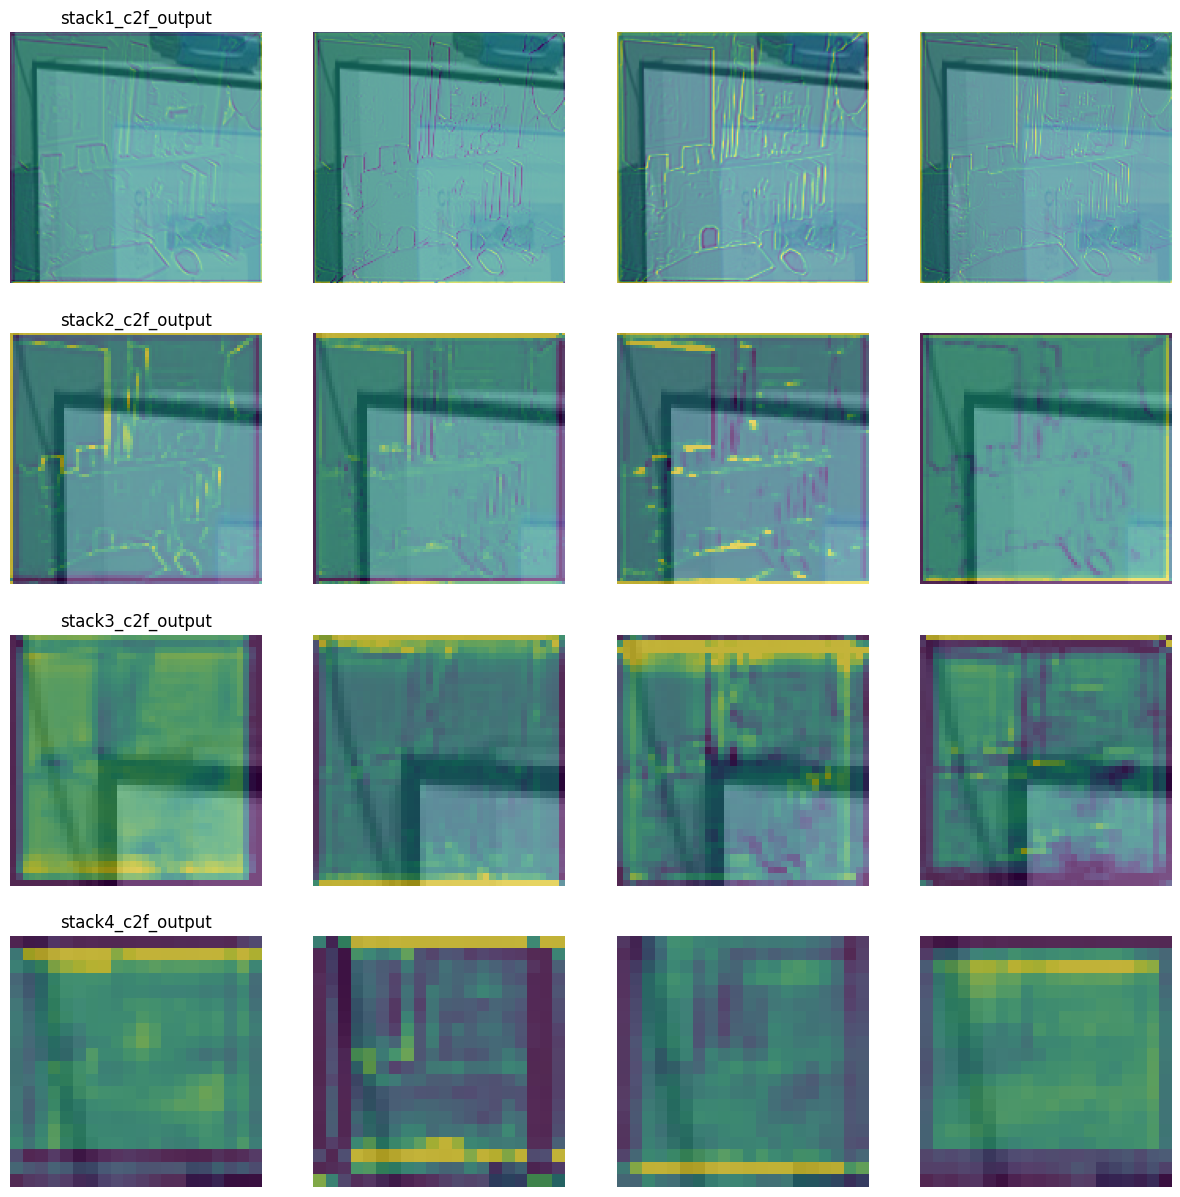

In [35]:
import tensorflow as tf
import keras_cv.models
from tensorflow.keras.utils import plot_model
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model

model = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_xs_backbone_coco",
)


def load_image(img_path, target_size=(640, 640)):
    img = Image.open(img_path).convert('RGB')  # Convert to RGB to ensure 3 channels
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image_path = 'data/download1.png'  # Replace with your image path
input_image = load_image(image_path)


# Pass the image through the model
features = model(input_image)

# Create a model that gives outputs of all intermediate layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the activations for the input image
activations = activation_model.predict(input_image)

def display_activation_maps(activations, input_img, layer_names, n_cols=4):
    n_rows = len(activations)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    
    for i, (activation, layer_name) in enumerate(zip(activations, layer_names)):
        num_filters = activation.shape[-1]
        for col in range(n_cols):
            filter_index = col
            if filter_index < num_filters:
                activation_img = activation[0, :, :, filter_index]
                activation_img -= activation_img.mean()
                activation_img /= activation_img.std()
                activation_img *= 64
                activation_img += 128
                activation_img = np.clip(activation_img, 0, 255).astype('uint8')
                
                ax = axes[i, col]
                ax.imshow(input_img)
                ax.imshow(activation_img, cmap='viridis', alpha=0.6)
                ax.axis('off')
                
        # Set layer name as the title for the first column of each row
        axes[i, 0].set_title(layer_name)
    
    plt.show()

# intermediate outputs
layer_names = ['stack1_c2f_output', 'stack2_c2f_output', 'stack3_c2f_output', 'stack4_c2f_output']  # Filter for convolutional layers
intermediate_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])

# Get the activations for the input image
activations = intermediate_model.predict(input_image)

# Visualize the activation maps
input_img = np.array(Image.open(image_path).resize((640, 640)))
display_activation_maps(activations, input_img, layer_names)

### **BackBone Architecture**

In [33]:
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True)

## **Inference on High resolution image with small objects** 
(3000x3000 px vs an avg object of 200x200 px)

2024-08-06 23:29:17.196781: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-06 23:29:17.210836: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 23:29:17.326028: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 23:29:17.454235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 23:29:17.561020: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


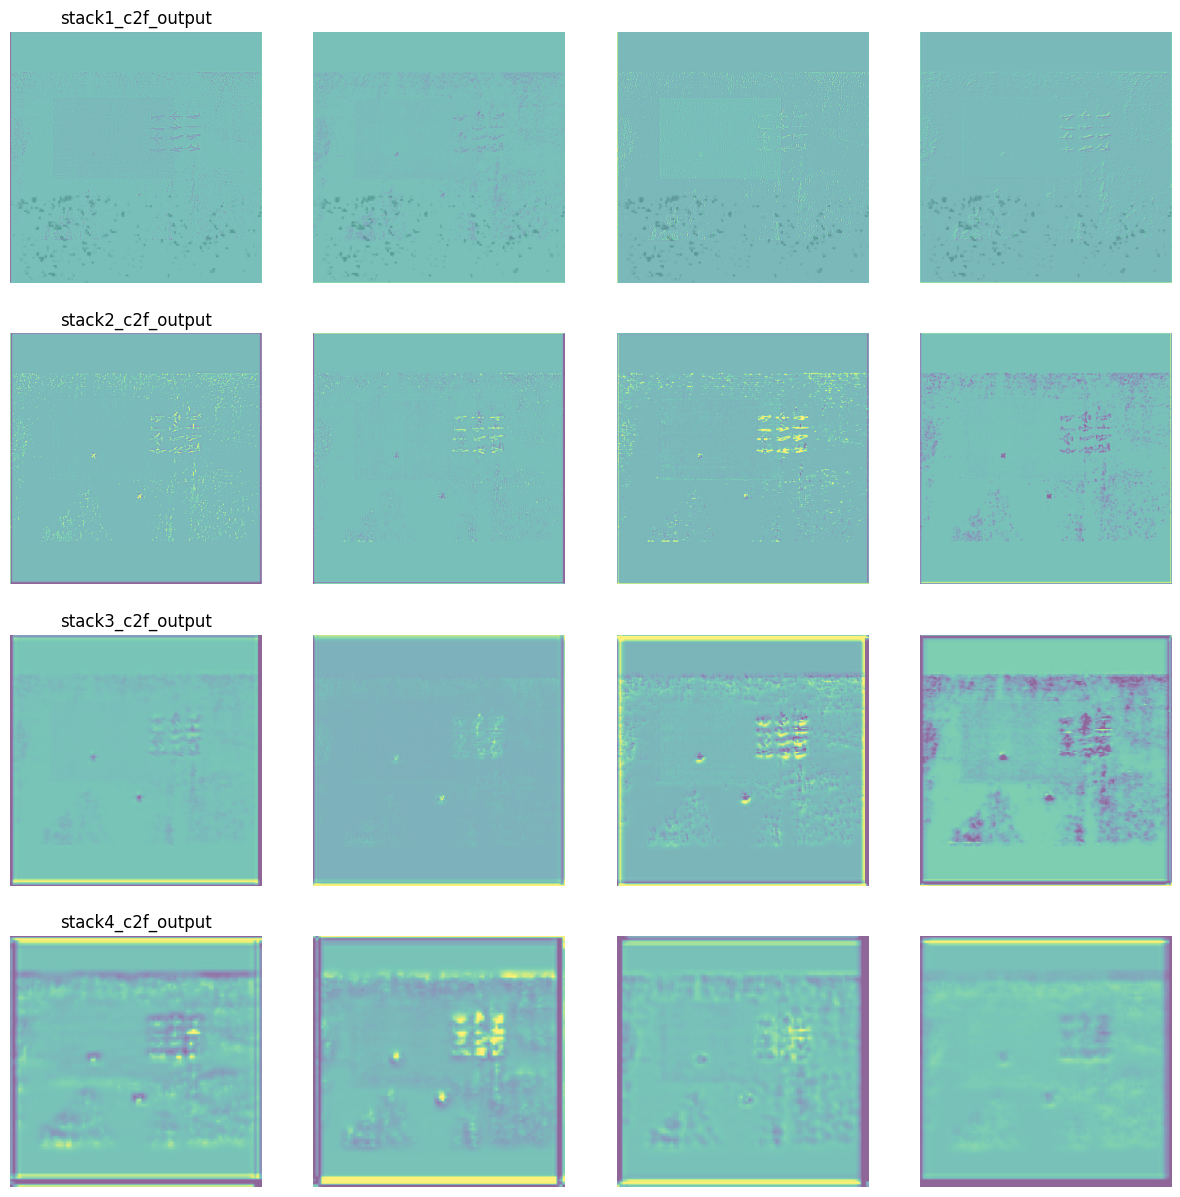

In [1]:
import tensorflow as tf
import keras_cv.models
from tensorflow.keras.utils import plot_model
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model

model = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_xs_backbone_coco",
)

def load_image(img_path, target_size=(3000, 3000)):
    img = Image.open(img_path).convert('RGB')  # Convert to RGB to ensure 3 channels
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image_path = 'data/illustrator_5.jpg'  # Replace with your image path
input_image = load_image(image_path)


# Pass the image through the model
features = model(input_image)

# Create a model that gives outputs of all intermediate layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the activations for the input image
activations = activation_model.predict(input_image)

def display_activation_maps(activations, input_img, layer_names, n_cols=4):
    n_rows = len(activations)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    
    for i, (activation, layer_name) in enumerate(zip(activations, layer_names)):
        num_filters = activation.shape[-1]
        for col in range(n_cols):
            filter_index = col
            if filter_index < num_filters:
                activation_img = activation[0, :, :, filter_index]
                activation_img -= activation_img.mean()
                activation_img /= activation_img.std()
                activation_img *= 64
                activation_img += 128
                activation_img = np.clip(activation_img, 0, 255).astype('uint8')
                
                ax = axes[i, col]
                ax.imshow(input_img)
                ax.imshow(activation_img, cmap='viridis', alpha=0.6)
                ax.axis('off')
                
        # Set layer name as the title for the first column of each row
        axes[i, 0].set_title(layer_name)
    
    plt.show()

# intermediate outputs
layer_names = ['stack1_c2f_output', 'stack2_c2f_output', 'stack3_c2f_output', 'stack4_c2f_output']  # Filter for convolutional layers
intermediate_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])

# Get the activations for the input image
activations = intermediate_model.predict(input_image)

# Visualize the activation maps
input_img = np.array(Image.open(image_path).resize((3000, 3000)))
display_activation_maps(activations, input_img, layer_names)